In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
train=pd.read_csv(r"D:\project\dataset\archive_4\clean_data.csv")
train.head()


,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [23]:
train.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [12]:
train.isnull()

,price,area,status,bhk,bathroom,age,location,builder
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2615,False,False,False,False,False,False,False,False
2616,False,False,False,False,False,False,False,False
2617,False,False,False,False,False,False,False,False
2618,False,False,False,False,False,False,False,False


<AxesSubplot:>

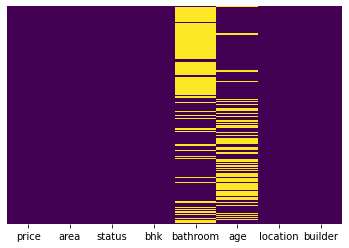

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='status', ylabel='count'>

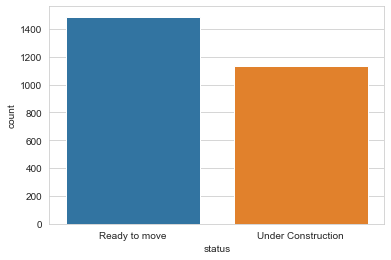

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='status',data=train)

<AxesSubplot:xlabel='status', ylabel='count'>

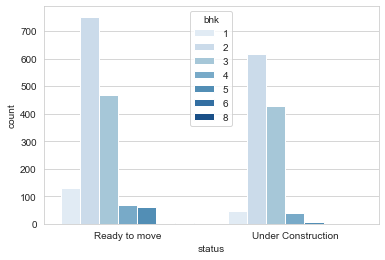

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='status',hue='bhk',data=train,palette="Blues")

C:\Users\jithu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathroom'>

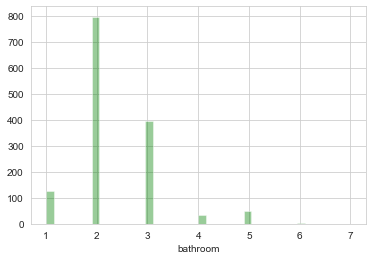

In [9]:
sns.distplot(train['bathroom'].dropna(),kde=False,color='g',bins=40)

In [24]:
train['age'].unique()

array([ 1., nan,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12.,
       16., 17.,  8., 32.])

In [25]:
train['age'].value_counts()

0.0     942
3.0     260
1.0     235
4.0     100
2.0      72
5.0      60
6.0      31
9.0      11
7.0       8
11.0      3
12.0      2
13.0      1
16.0      1
17.0      1
8.0       1
32.0      1
Name: age, dtype: int64

In [26]:
train['age'].mode()[0]

0.0

In [29]:
train['age']=train['age'].fillna(train['age'].mode()[0])

In [30]:
train['age'].isnull().sum()

0

In [31]:
train.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,0.0,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [32]:
train['bathroom'].unique()

array([nan,  2.,  1.,  3.,  4.,  5.,  6.,  7.])

In [33]:
train['bathroom'].value_counts()

2.0    796
3.0    395
1.0    125
5.0     49
4.0     33
6.0      4
7.0      1
Name: bathroom, dtype: int64

In [34]:
train['bathroom'].mode()[0]

2.0

In [35]:
train['bathroom']=train['bathroom'].fillna(train['bathroom'].mode()[0])

<AxesSubplot:>

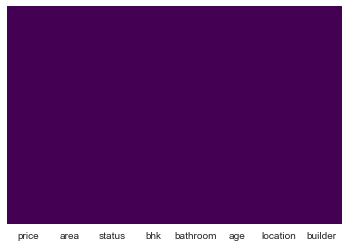

In [36]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [39]:
train.isnull().sum()

price       0
area        0
status      0
bhk         0
bathroom    0
age         0
location    0
builder     0
dtype: int64

In [47]:
loc_stat=train['location'].value_counts(ascending=False)

In [51]:
loc_stat_over_10=loc_stat[loc_stat>10]

In [50]:
loc_stat_below_10 = loc_stat[loc_stat<=10]

In [52]:
train.location = train.location.apply(lambda x: 'other' if x in loc_stat_below_10 else x)
len(train.location.unique())

60

In [54]:
train.head(60)

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,2.0,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,0.0,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,2.0,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
5,188.00,2221,Under Construction,3,3.0,0.0,other,Traventure Homes Pvt Ltd
6,38.00,885,Under Construction,3,2.0,0.0,Thirumazhisai,Urbanrise
7,72.99,936,Ready to move,3,2.0,6.0,other,Navin Housing Properties P LTD
8,125.00,2275,Ready to move,4,2.0,1.0,other,Jones foundation private limited
9,24.56,622,Under Construction,2,2.0,0.0,Perungalathur,Isha Homes


In [55]:
builder_stats = train['builder'].value_counts(ascending=False)

In [57]:
builder_stat_over_10=builder_stats[builder_stats>10]

In [58]:
builder_stat_below_10=builder_stats[builder_stats<=10]

In [60]:
train.builder = train.builder.apply(lambda x: 'other' if x in builder_stat_below_10 else x)
len(train.builder.unique())

57

In [63]:
train[train.area/train.bhk<300].head(20)

,price,area,status,bhk,bathroom,age,location,builder
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd
6,38.00,885,Under Construction,3,2.0,0.0,Thirumazhisai,other
43,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers
54,29.62,528,Ready to move,2,2.0,1.0,Pammal,Bharathi Construction
206,35.34,594,Ready to move,2,2.0,2.0,Vengaivasal,other
208,35.16,591,Ready to move,2,2.0,2.0,Vengaivasal,other
209,35.58,598,Ready to move,2,2.0,2.0,Vengaivasal,other
302,28.00,561,Under Construction,2,2.0,0.0,Thirumazhisai,other
304,30.00,576,Under Construction,2,2.0,0.0,Thirumazhisai,other
567,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [64]:
df1 = train[~(train.area/train.bhk<300)]

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2593 non-null   float64
 1   area      2593 non-null   int64  
 2   status    2593 non-null   object 
 3   bhk       2593 non-null   int64  
 4   bathroom  2593 non-null   float64
 5   age       2593 non-null   float64
 6   location  2593 non-null   object 
 7   builder   2593 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 182.3+ KB


In [67]:
df1['price_per_sqft'] = df1['price']*100000/df1['area']
df1.head()

C:\Users\jithu\AppData\Local\Temp/ipykernel_8740/1634922634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft'] = df1['price']*100000/df1['area']


,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
0,37.49,872,Ready to move,2,2.0,1.0,Sembakkam,MP Developers,4299.311927
1,93.54,1346,Under Construction,3,2.0,0.0,Selaiyur,DAC Promoters,6949.479941
2,151.00,2225,Under Construction,3,2.0,0.0,Mogappair,Casagrand Builder Private Limited,6786.516854
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,other,4766.536965
5,188.00,2221,Under Construction,3,3.0,0.0,other,other,8464.655561


In [68]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df1)
df2.shape

(2011, 9)

In [101]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price in Lakhs")
    plt.title(location)
    plt.legend()

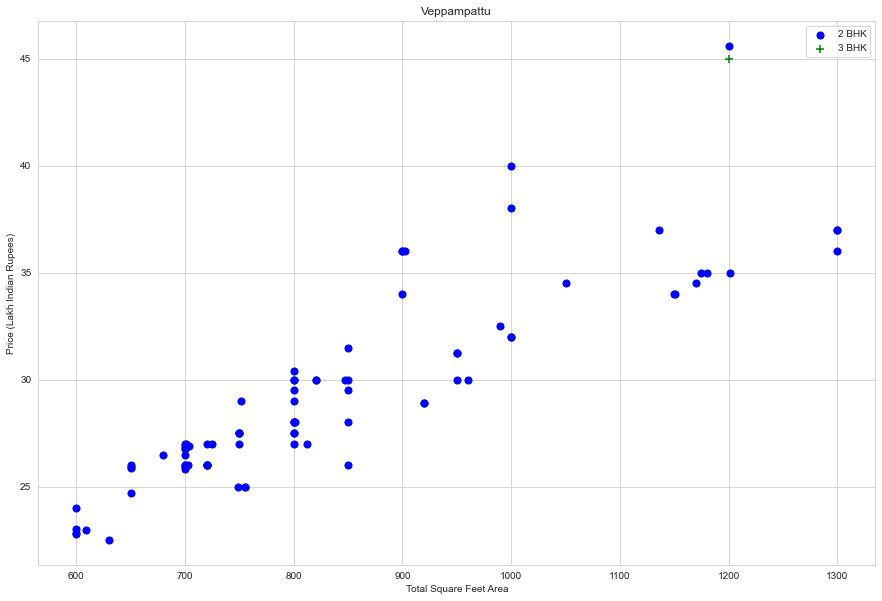

In [76]:
plot_scatter_chart(df2,"Veppampattu")

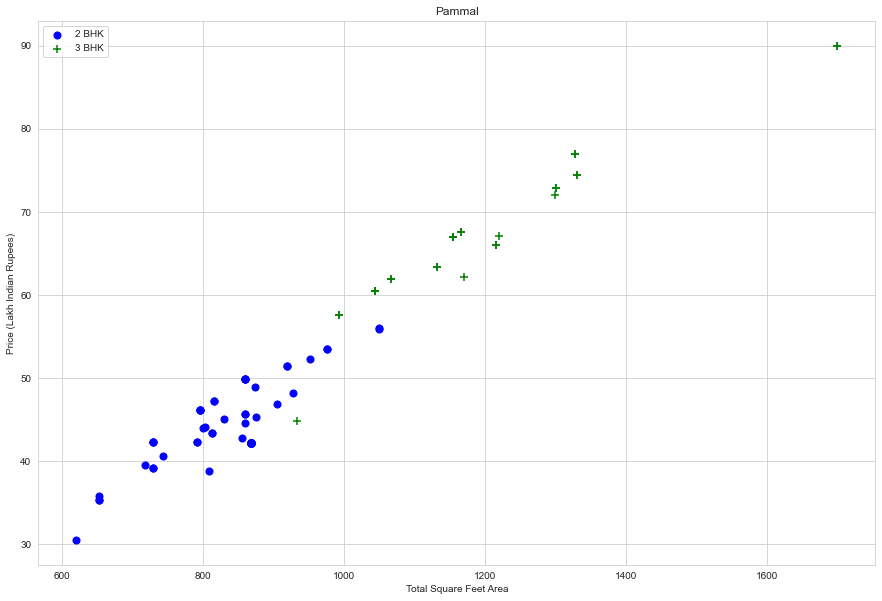

In [77]:
plot_scatter_chart(df2,"Pammal")

In [78]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df3 = remove_bhk_outliers(df2)
df3.shape

(1592, 9)

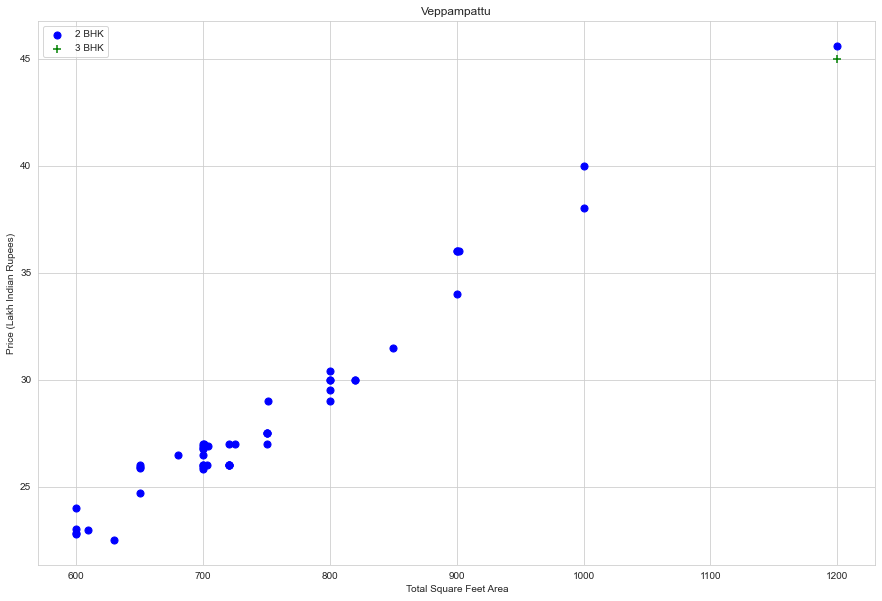

In [79]:
plot_scatter_chart(df3,"Veppampattu")

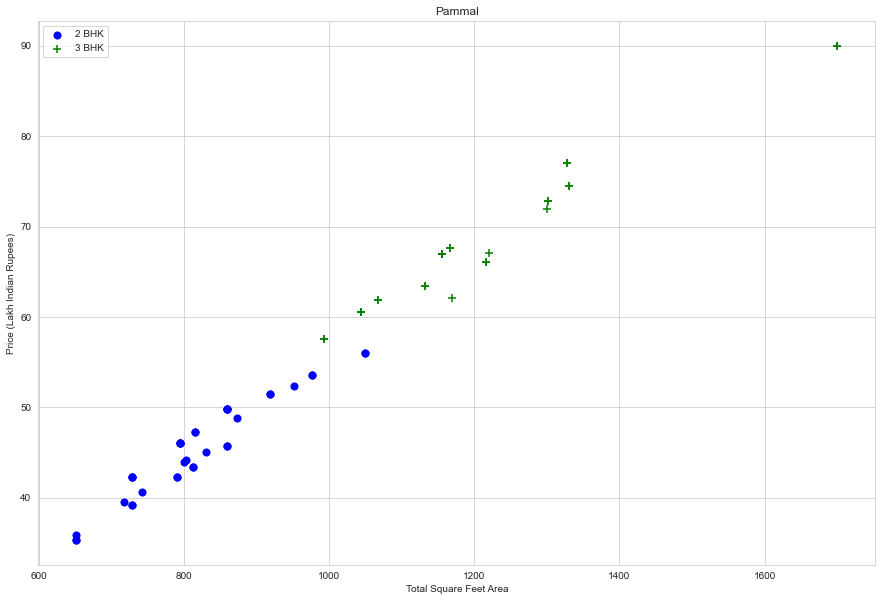

In [80]:
plot_scatter_chart(df3,"Pammal")

Text(0, 0.5, 'Count')

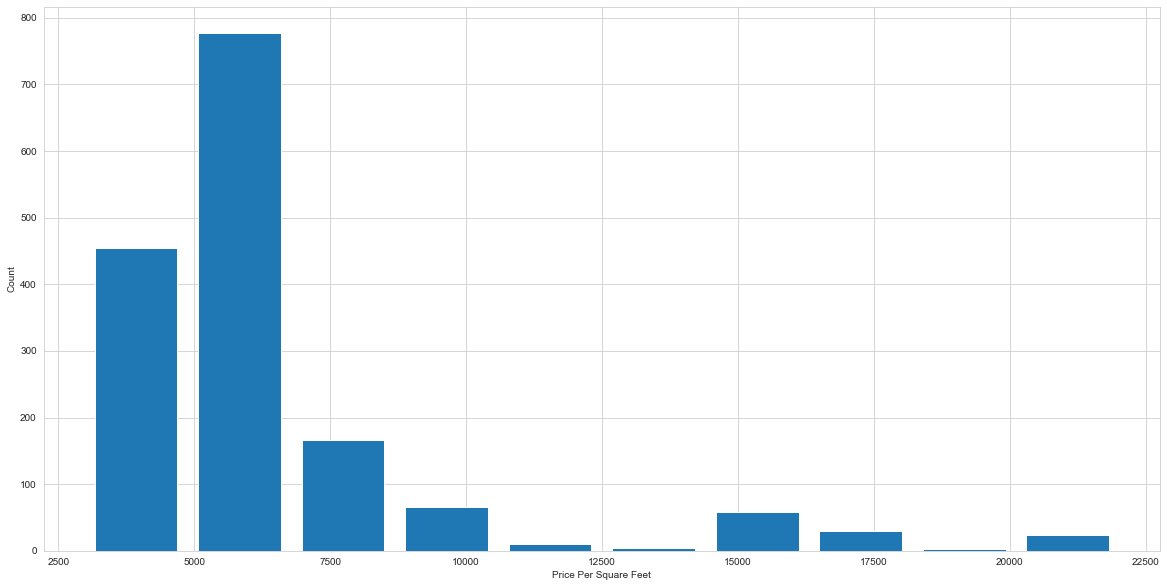

In [81]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

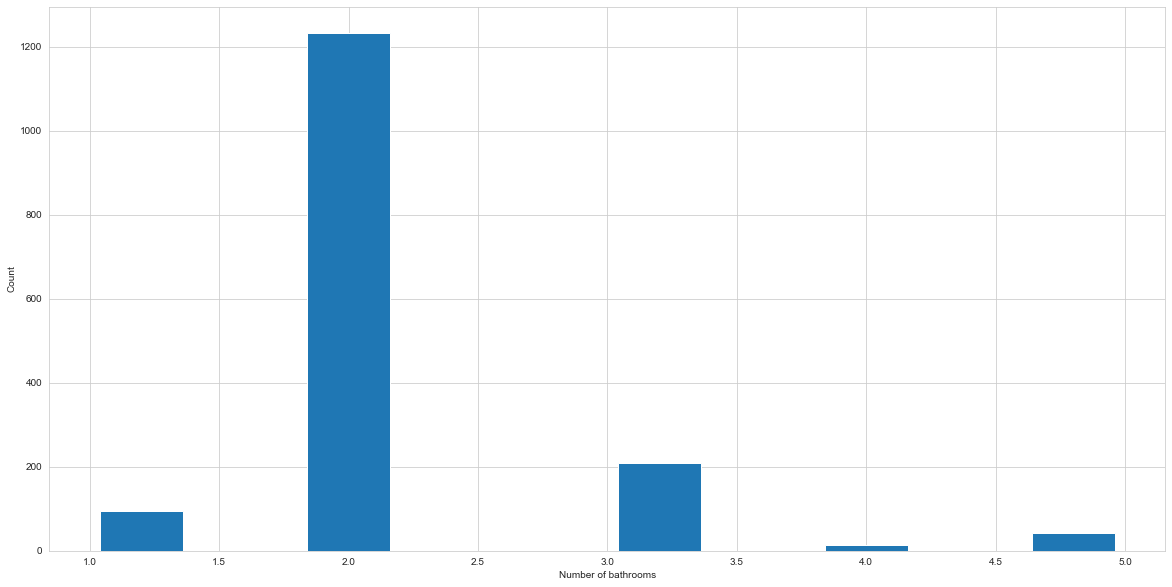

In [83]:
plt.hist(df3.bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [84]:
df3.head()

,price,area,status,bhk,bathroom,age,location,builder,price_per_sqft
0,261.0,1548,Ready to move,3,2.0,1.0,Adyar,other,16860.465116
1,278.0,1652,Ready to move,3,2.0,1.0,Adyar,other,16828.087167
2,274.0,1627,Ready to move,3,2.0,1.0,Adyar,other,16840.811309
3,210.0,1381,Under Construction,3,3.0,0.0,Adyar,seller,15206.372194
6,230.0,1755,Under Construction,3,3.0,0.0,Adyar,HomeFirst,13105.413105


In [85]:
df4 = df3.drop(['price_per_sqft'],axis='columns')

In [86]:
dummy1 = pd.get_dummies(df4.location)
dummy2 = pd.get_dummies(df4.builder)

In [87]:
df4.drop(['status'],axis=1,inplace=True)

In [88]:
df4 = pd.concat(((df4,dummy1,dummy2)),axis=1)

In [89]:
df4.head()

,price,area,bhk,bathroom,age,location,builder,Adyar,Alwarpet,Ambattur,...,The Nest Builder,Urban Tree Infrastructures,VGK Builders Pvt Ltd,VNR Homes,Velan Housing Properties,Vinay Asrani,other,seller,smartassetsindia,viswaraj
0,261.0,1548,3,2.0,1.0,Adyar,other,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,278.0,1652,3,2.0,1.0,Adyar,other,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,274.0,1627,3,2.0,1.0,Adyar,other,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,210.0,1381,3,3.0,0.0,Adyar,seller,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,230.0,1755,3,3.0,0.0,Adyar,HomeFirst,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df4.drop(['location','builder'],axis=1,inplace=True)

In [91]:
df4.head()

,price,area,bhk,bathroom,age,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,...,The Nest Builder,Urban Tree Infrastructures,VGK Builders Pvt Ltd,VNR Homes,Velan Housing Properties,Vinay Asrani,other,seller,smartassetsindia,viswaraj
0,261.0,1548,3,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,278.0,1652,3,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,274.0,1627,3,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,210.0,1381,3,3.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,230.0,1755,3,3.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X = df4.drop(['price'],axis=1)
X.head()

,area,bhk,bathroom,age,Adyar,Alwarpet,Ambattur,Anna Nagar,Ayanambakkam,Chromepet,...,The Nest Builder,Urban Tree Infrastructures,VGK Builders Pvt Ltd,VNR Homes,Velan Housing Properties,Vinay Asrani,other,seller,smartassetsindia,viswaraj
0,1548,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1652,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1627,3,2.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1381,3,3.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1755,3,3.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X.shape

(1592, 119)

In [94]:
y = df4.price
y.head()

0    261.0
1    278.0
2    274.0
3    210.0
6    230.0
Name: price, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [96]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9456532994635561

In [98]:
def predict_price(location,builder,sqft,bath,bhk,age):    
    loc_index = np.where(X.columns==location)[0][0]
    builder_index = np.where(X.columns==builder)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    x[3] = age
    if loc_index >= 0:
        x[loc_index] = 1
    if builder_index >= 0:
        x[builder_index] = 1

    return lr_clf.predict([x])[0]

In [99]:
predict_price('Pammal','MC Foundation',1000, 2, 2, 1)

C:\Users\jithu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


74.2087574005127

In [100]:
predict_price('Veppampattu','Propsource Realty Private Limited',1000, 3, 3, 0)

C:\Users\jithu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


7.621381759643555